<h4>Chart on application comparison on Google Play & Apple store</h4>

Goal : 

<ul>
 <li>count the number of application downloaded <b>COMPLETED</b> </li>
    <li>Which Category has the most downloaded apps <b> COMPLETED </b> </li>
</ul> 
 
 Plot a bar chart & regression method to see the downloaded pattern 
 
 
<h4> Part two </h4>

<ul>
    <li> Remove duplicates <b>COMPLETED</b></li>
    <li> Remove Application that is free <b>COMPLETED</b></li>
    <li> Remove Chinese Application on google store <b>COMPLETED</b></li>
    <li> Create a plot to see the pattern of download <b>COMPLETED</b></li>
    
</ul>    

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,8)})

In [12]:
# Function to open file
# include encoding utf8 for all character to be recognize
def openfile(file_path):
    opened_file = open(file_path , enconding='utf8')
    from csv import reader
    read_file = reader(opened_file)
    return list(read_file)

# openfile('../raw_data/googleplaystore.csv')

In [4]:
%%time
# Open file #2million Records
google = openfile('../raw_data/googleplaystore.csv')
apple = openfile('../raw_data/appleStore.csv')


#Extract data from raw format and assign to a list ( data value )
def data_extraction(data_set, index):
    column = []
    for row in data_set[1:]:
        value = row[index]
        column.append(value)
    return column
     
# Get the frequency of the selected value 
def freq_ratings(extracted_data_list):
    freq = {}
    for i in extracted_data_list:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    return freq       

CPU times: user 83.4 ms, sys: 18.2 ms, total: 102 ms
Wall time: 104 ms


[460 156 149 366 382 463 260 384 424  82]


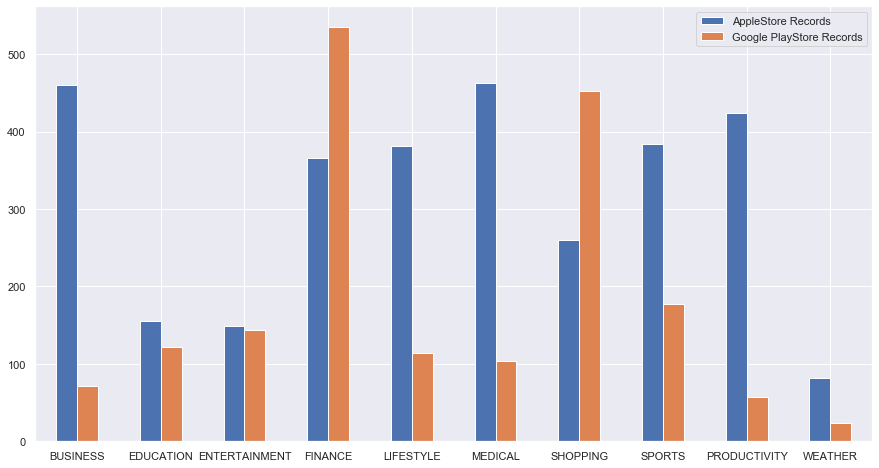

In [5]:
#set data to uppercase
def tabular(dataset, index):
    #Count Frequency 
    category = data_extraction(dataset,index)
    category_rating = freq_ratings(category)
    
    #Create tabular table : set all data to uppercase to match data
    category_rating = {x.upper():y for x,y in category_rating.items()}
    
    return pd.DataFrame(list(category_rating.items()), columns=['Category','Count'])

#Get common category
def common_category(dataframe_1, dataframe_2):
    data = np.intersect1d(dataframe_1.Category, np.intersect1d(dataframe_1.Category,dataframe_2.Category))
    return data
    
def createBarChart(df_1,df_2,cm_list):
    df1_arr = df_1[df_1['Category'].isin(cm_list)]
    df2_arr = df_2[df_2['Category'].isin(cm_list)]
    
    header = np.array(df1_arr['Category'])
    df_1 = np.array(df1_arr['Count'])
    df_2 = np.array(df2_arr['Count'])
    print(df_1)
    bar_chart = pd.DataFrame({'AppleStore Records': df_1,'Google PlayStore Records': df_2}, index=header)
    return bar_chart.plot.bar(rot=0)

df_g = tabular(google,1)
df_a = tabular(apple,11)
cm_list = common_category(df_a,df_g)

createBarChart(df_g,df_a,cm_list)


# df = df_g[df_g['Category'].isin(['BEAUTY','GAME'])]
# print(df_a.Category)
# np.intersect1d(df_g.Category, np.intersect1d(df_g.Category,df_a.Category))



## Part 2 of google application analysis project


In [14]:
def openfile(url):
    open_file = open(url, encoding='utf8')
    read_file = reader(open_file)
    data_list = list(read_file)
    data_header = data_list[0]
#     print(data_header)
    data = data_list[1:] 
    return data


andriod = openfile('../raw_data/googleplaystore.csv')
ios = openfile('../raw_data/appleStore.csv')

# andriod[0]

#Incorrect data for ratings
# andriod[10472] # Create a new function - Deep learning for text recognition 

In [15]:
# Check datasets
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line between rows
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))


In [16]:
#Data at 10472 has an invalid rating 
#Version 2.0 -> create a function that will detect character 
del andriod[10472]  

In [17]:

def removeDuplicates(datasets):
    
    #Variable to check no of duplicates
    duplicate_apps = []
    unique_apps = []
    
    # Variable to remove the number of duplicates 
    reviews_max = {}
    android_clean = []
    already_added = []
    
    #Check the number of duplicates 
    for i in datasets:
        name = i[0]
        if name in unique_apps:
            duplicate_apps.append(name)
        else:
            unique_apps.append(name)
    print('Number of duplicates is ', len(duplicate_apps))
    
    
    #Remove the duplicates actual - duplicates = result 
    for app in andriod:
        name = app[0]
        n_reviews = float(app[3])
        
        if name in reviews_max and reviews_max[name] < n_reviews:
            reviews_max[name] = n_reviews
        
        elif name not in reviews_max:
            reviews_max[name] = n_reviews
        
        #Append rows that excluding duplicates 
        if (reviews_max[name] == n_reviews) and (name not in already_added):
            android_clean.append(app)
            already_added.append(name) # make sure this is inside the if block    
    print('Number of rows available after excluding duplicates is : ' , len(android_clean))
        
    return android_clean

# df = removeDuplicates(andriod)    

In [ ]:
#check if it not enlgish application
def isEnglish(string):
    non_ascii = 0
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
         
    if non_ascii > 3:
        return False
    else:
        return True

#Record data that exlcude non english application     
def isEnglist_dataset(datasets,index):
    eng_dataset = []
    for app in datasets:
        name = app[index]
        if isEnglish(name):
            eng_dataset.append(app)
    print('Number of rows available after removing non english application is : ', len(eng_dataset))        
    return eng_dataset    

In [19]:
#7 index for pricing

def free_application(dataset,index):
    free_dataset = []
    
    #record paid application
    for app in dataset:
        price = app[index]
        if price == '0':
            free_dataset.append(app)
    print('Number of rows available after removing free application is : ', len(free_dataset))    
    return free_dataset

df = free_application(isEnglist_dataset(removeDuplicates(andriod),0),7)            

Number of duplicates is  1181
Number of rows available after excluding duplicates is :  9659
Number of rows available after removing non english application is :  9614
Number of rows available after removing free application is :  8862


In [20]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    result = {}
    percent = []
    title = []
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
#         print(entry[1], ':', entry[0])
        result[entry[1]] = entry[0]
    return result
       
#         result[entry[1]] = entry[0] 
#          percent.append(entry[0])
#         print(entry[1], ':', entry[0])
#      return result    

Text(0, 0.5, 'Percentage')

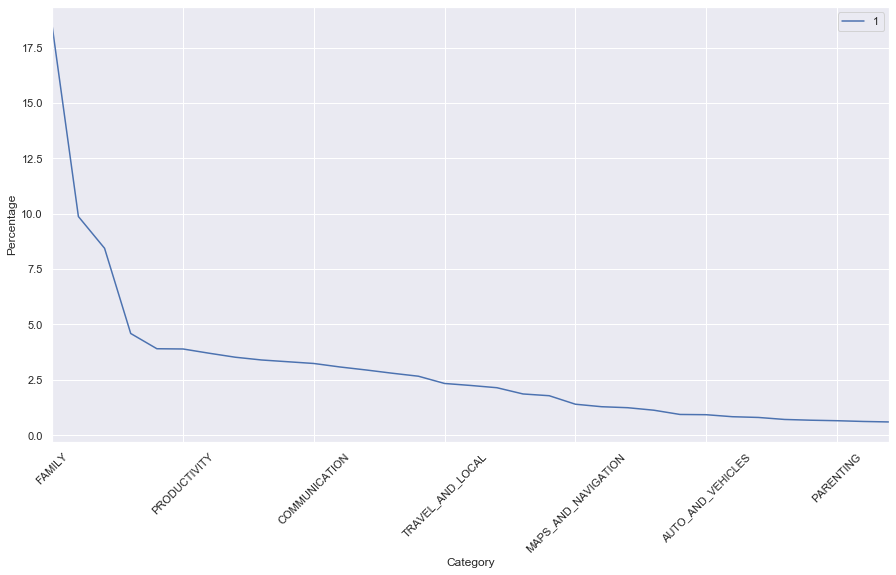

In [21]:
dp = pd.DataFrame(display_table(df, 1).items(), columns = [0,1])
dp.set_index(0).plot()
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Percentage')

# target_date = dataset.set_index(pd.Index(date_index,'Date'))
# pd.DataFrame(pdFrame).setIndex('asd')
# freq_table(df, 1)

In [24]:
#-- Finding data installeed
# for app in df:
#     if app[1] == 'BOOKS_AND_REFERENCE':
# #         print(app[0], ':', app[5])